# **Task 1**
# **Defining the Data Analysis Workflow** and **Understanding the Model and Data**

# Import Necessary Libraries

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Print current Python path for debugging
print(sys.path)


['c:\\Users\\yami\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'c:\\Users\\yami\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'c:\\Users\\yami\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'c:\\Users\\yami\\AppData\\Local\\Programs\\Python\\Python312', '', 'C:\\Users\\yami\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\yami\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32', 'C:\\Users\\yami\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\yami\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin', 'c:\\Users\\yami\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages', 'C:\\Users\\yami\\Desktop\\KIAM 3\\Week 10\\Brent-Oil-Analysis\\Brent-Oil-Analysis\\scripts']


# Add Scripts Directory to Python Path

In [24]:
# Add the scripts directory to Python path
scripts_dir = os.path.abspath(r'C:\Users\yami\Desktop\KIAM 3\Week 10\Brent-Oil-Analysis\Brent-Oil-Analysis\scripts')
sys.path.append(scripts_dir)


# Set Display Options for Pandas

In [25]:
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


# Configure Logging and Import Classes

In [26]:
# Configure logging
from custom_logger import SetupLogger
from preprocess import DataPreprocessor

# Initialize logger
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()


# Load the data

In [27]:
file_path = r'C:\Users\yami\Desktop\KIAM 3\Week 10\data\BrentOilPrices.csv'
processor = DataPreprocessor(file_path, logger=logger)
price_data = processor.load_data()

# Check if data loaded successfully
print(price_data.head())


C:\Users\yami\Desktop\KIAM 3\Week 10\Brent-Oil-Analysis\Brent-Oil-Analysis\scripts\preprocess.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['Date'] = pd.to_datetime(self.data['Date'].str.strip(), errors='coerce')


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


# Explore the data

In [28]:
# Explore the first 10 rows
price_data.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [29]:
# Explore the last 10 rows
price_data.tail(10)

,Date,Price
9001,2022-11-01,95.12
9002,2022-11-02,96.07
9003,2022-11-03,95.29
9004,2022-11-04,99.53
9005,2022-11-07,99.87
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37
9010,2022-11-14,93.59


# Create Event Dataset collected from various sources

In [62]:

# Define the events dictionary
events_dict = {
    "Gulf War (1990-1991)": {"start": "1990-08-02", "end": "1991-02-28"},
    "September 11 Attacks (2001)": {"start": "2001-09-11", "end": "2001-09-11"},
    "2003 Invasion of Iraq": {"start": "2003-03-20", "end": "2011-12-18"},
    "2008 Financial Crisis": {"start": "2008-09-15", "end": "2009-07-01"},
    "Arab Spring (2010-2012)": {"start": "2010-12-18", "end": "2012-12-18"},
    "Libyan Civil War (2011)": {"start": "2011-02-15", "end": "2011-10-23"},
    "U.S. Shale Oil Boom (2010s)": {"start": "2010-01-01", "end": "2019-12-31"},
    "OPEC Production Cuts (2016-2017)": {"start": "2016-11-30", "end": "2017-06-30"},
    "Iran Nuclear Deal and Sanctions (2015-2018)": {"start": "2015-07-14", "end": "2018-05-07"},
    "COVID-19 Pandemic (2020)": {"start": "2020-03-11", "end": "2022-09-30"},
    "OPEC+ Response to COVID-19 (2020)": {"start": "2020-04-09", "end": "2020-12-31"},
    "Russia-Ukraine Conflict (2022)": {"start": "2022-02-24", "end": "2022-09-30"},
    "Global Economic Recovery (2021-2022)": {"start": "2021-01-01", "end": "2022-09-30"}
}

# Convert the events dictionary to a DataFrame
events_data = pd.DataFrame.from_dict(events_dict, orient='index')
events_data.reset_index(inplace=True)
events_data.columns = ['Event', 'Start', 'End']

# Convert Start and End to datetime
events_data['Start'] = pd.to_datetime(events_data['Start'])
events_data['End'] = pd.to_datetime(events_data['End'])



In [63]:
# Load your Brent oil prices data
price_data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
price_data['Date'] = pd.to_datetime(price_data['Date'])

# Initialize an empty column for events
price_data['Event'] = 'No Event'  # Default to 'No Event'

# Assign events to the price_data based on the date range
for _, row in events_data.iterrows():
    price_data.loc[(price_data['Date'] >= row['Start']) & (price_data['Date'] <= row['End']), 'Event'] = row['Event']



C:\Users\yami\AppData\Local\Temp\ipykernel_8340\3293437634.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_data['Date'] = pd.to_datetime(price_data['Date'])


In [64]:
events_data

,Event,Start,End
0,Gulf War (1990-1991),1990-08-02,1991-02-28
1,September 11 Attacks (2001),2001-09-11,2001-09-11
2,2003 Invasion of Iraq,2003-03-20,2011-12-18
3,2008 Financial Crisis,2008-09-15,2009-07-01
4,Arab Spring (2010-2012),2010-12-18,2012-12-18
5,Libyan Civil War (2011),2011-02-15,2011-10-23
6,U.S. Shale Oil Boom (2010s),2010-01-01,2019-12-31
7,OPEC Production Cuts (2016-2017),2016-11-30,2017-06-30
8,Iran Nuclear Deal and Sanctions (2015-2018),2015-07-14,2018-05-07
9,COVID-19 Pandemic (2020),2020-03-11,2022-09-30


# Combine the Price Data with Event Data

In [66]:
# Initialize an empty column for events
price_data['Event'] = 'No Event'  # Default to 'No Event'

# Assign events to the price_data based on the date range
for _, row in events_data.iterrows():
    price_data.loc[(price_data['Date'] >= row['Start']) & (price_data['Date'] <= row['End']), 'Event'] = row['Event']

# Now combine the price_data with event information
combined_data = price_data.copy()

In [54]:
def merge_event(events_data: pd.DataFrame, price_data: pd.DataFrame) -> pd.DataFrame:
    # Ensure Date, Start, and End columns are in datetime format
    price_data['Date'] = pd.to_datetime(price_data['Date'])
    events_data['Start'] = pd.to_datetime(events_data['Start'])
    events_data['End'] = pd.to_datetime(events_data['End'])

    # Create a DataFrame that contains each price date with corresponding events
    events_expanded = pd.DataFrame({
        'Date': pd.date_range(start=events_data['Start'].min(), end=events_data['End'].max(), freq='D')
    })

    # Merge the expanded events data with events_data to assign event names
    merged_data = pd.merge_asof(
        events_expanded.sort_values('Date'), 
        events_data.sort_values('Start'), 
        left_on='Date', 
        right_on='Start', 
        direction='backward'
    )

    # Merge the price data with the merged event data
    price_data = price_data.merge(merged_data[['Date', 'Event']], on='Date', how='left')

    # Initialize the 'Event' column if it doesn't exist
    if 'Event' not in price_data.columns:
        price_data['Event'] = 'No Event'

    # Fill the 'Event' column with 'No Event' where there is no match
    price_data['Event'] = price_data['Event'].fillna('No Event')

    return price_data


# Apply the function to merge events to each price date
price_data = merge_event(events_data, price_data)


In [67]:
# Now price_data contains the original price data along with the corresponding events
price_data.head(10)

,Date,Price,Event
0,1987-05-20,18.63,No Event
1,1987-05-21,18.45,No Event
2,1987-05-22,18.55,No Event
3,1987-05-25,18.60,No Event
4,1987-05-26,18.63,No Event
5,1987-05-27,18.60,No Event
6,1987-05-28,18.60,No Event
7,1987-05-29,18.58,No Event
8,1987-06-01,18.65,No Event
9,1987-06-02,18.68,No Event


In [68]:
price_data.iloc[8011:8021]

,Date,Price,Event
8011,2018-12-07,61.71,U.S. Shale Oil Boom (2010s)
8012,2018-12-10,60.29,U.S. Shale Oil Boom (2010s)
8013,2018-12-11,59.73,U.S. Shale Oil Boom (2010s)
8014,2018-12-12,59.94,U.S. Shale Oil Boom (2010s)
8015,2018-12-13,59.03,U.S. Shale Oil Boom (2010s)
8016,2018-12-14,58.56,U.S. Shale Oil Boom (2010s)
8017,2018-12-17,57.59,U.S. Shale Oil Boom (2010s)
8018,2018-12-18,55.26,U.S. Shale Oil Boom (2010s)
8019,2018-12-19,55.60,U.S. Shale Oil Boom (2010s)
8020,2018-12-20,52.84,U.S. Shale Oil Boom (2010s)


# Data Cleaning and Preprocessing

# Inspect the dataset for completeness and structure

In [69]:
print(price_data.columns)
processor.inspect(price_data)

Index(['Date', 'Price', 'Event'], dtype='object')


# Detect Outliers

# Box plot

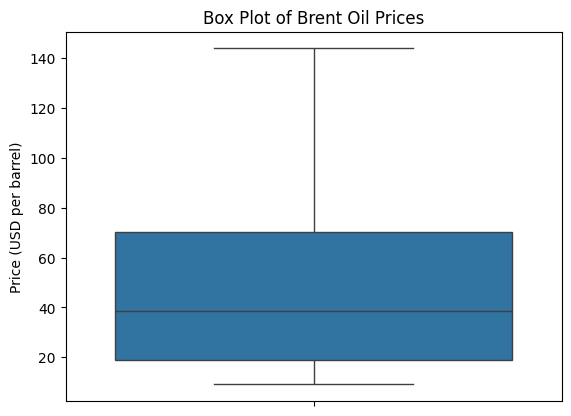

In [70]:
# Assuming 'price_data' is your DataFrame containing the 'Price' column
sns.boxplot(data=price_data, y='Price')
plt.title('Box Plot of Brent Oil Prices')
plt.ylabel('Price (USD per barrel)')
plt.show()

# Exploratory Data Analysis

# Descriptive Statistics

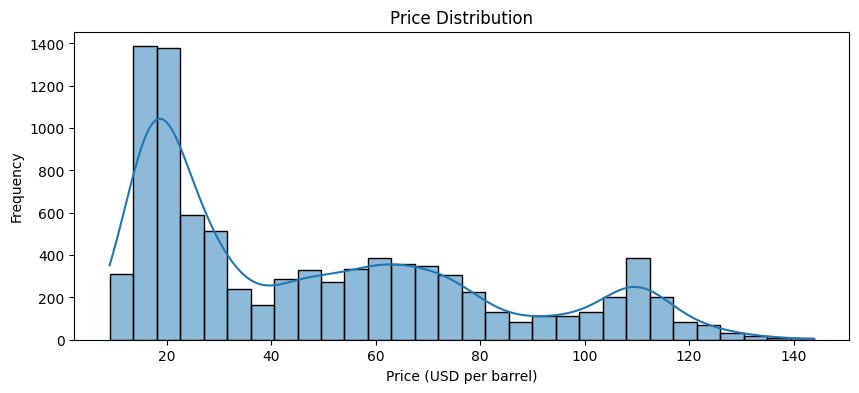

In [71]:
# Visualize the price distribution
plt.figure(figsize=(10, 4))
sns.histplot(price_data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD per barrel)')
plt.ylabel('Frequency')
plt.show()

# Event Distribution

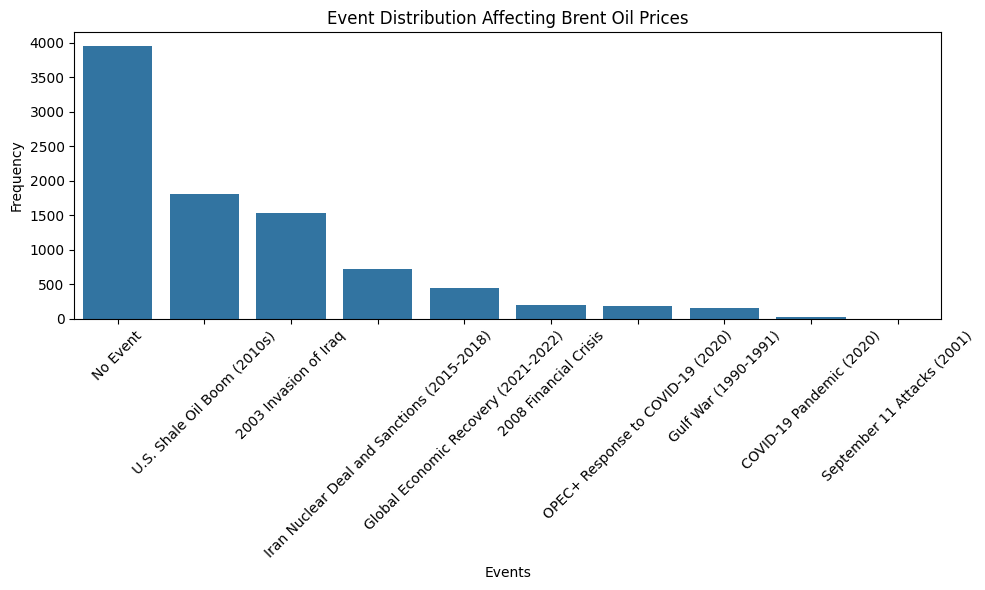

In [74]:
# Count the occurrences of each event
event_counts = price_data['Event'].value_counts()

# Plot the distribution of events
plt.figure(figsize=(10, 6))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Event Distribution Affecting Brent Oil Prices')
plt.xlabel('Events')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
print(price_data.columns)

Index(['Date', 'Price', 'Event'], dtype='object')


# Plot Time Series Data
# Create a line graph to visualize price trends over time.

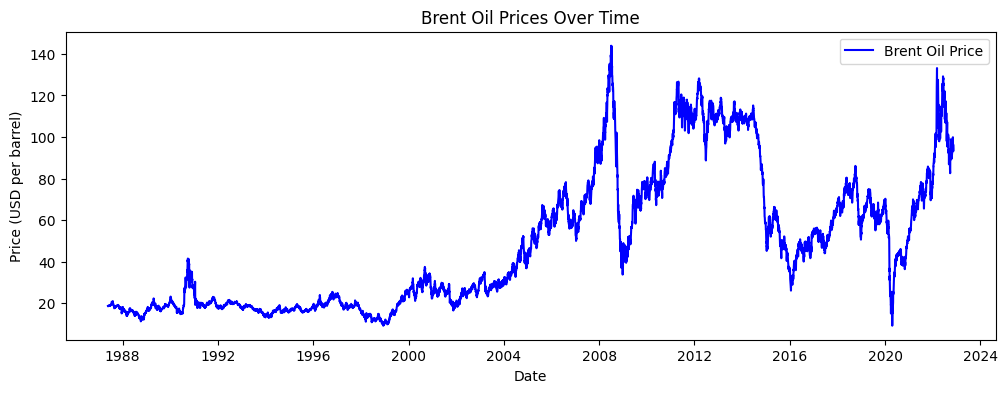

In [76]:
plt.figure(figsize=(12, 4))
plt.plot(price_data['Date'], price_data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
# plt.axvline(x='Date', color='red', linestyle='--', label='Event Marker')
plt.legend()
plt.show()

# Analysis Seasonality
# Aggregate prices by year and visualize seasonal patterns.

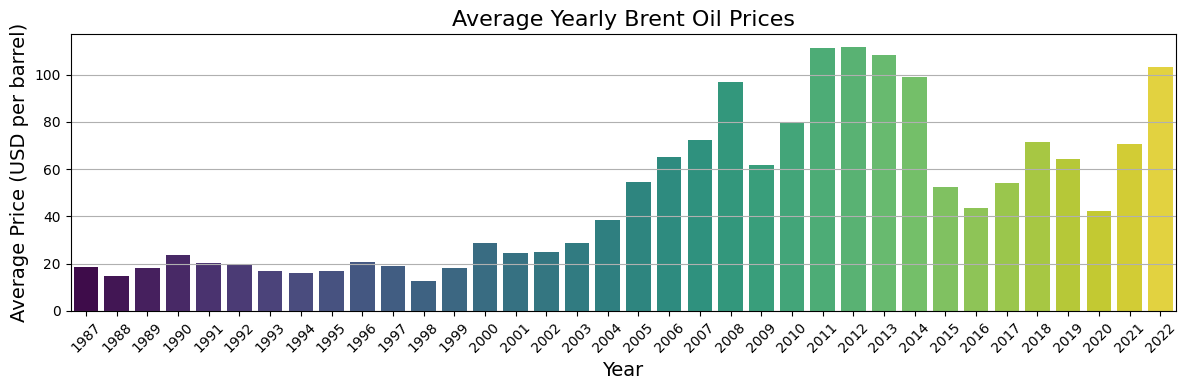

In [77]:
# Extract the year from the Date
price_data['Year'] = price_data['Date'].dt.year

# Calculate average price per year
yearly_avg = price_data.groupby('Year')['Price'].mean().reset_index()

# Plot yearly average prices
plt.figure(figsize=(12, 4))
sns.barplot(x='Year', y='Price', data=yearly_avg, hue='Year', legend=False, palette='viridis')
plt.title('Average Yearly Brent Oil Prices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (USD per barrel)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Scatter Plots for Price Fluctuations
# Generate scatter plots to observe price fluctuations associated with specific events.

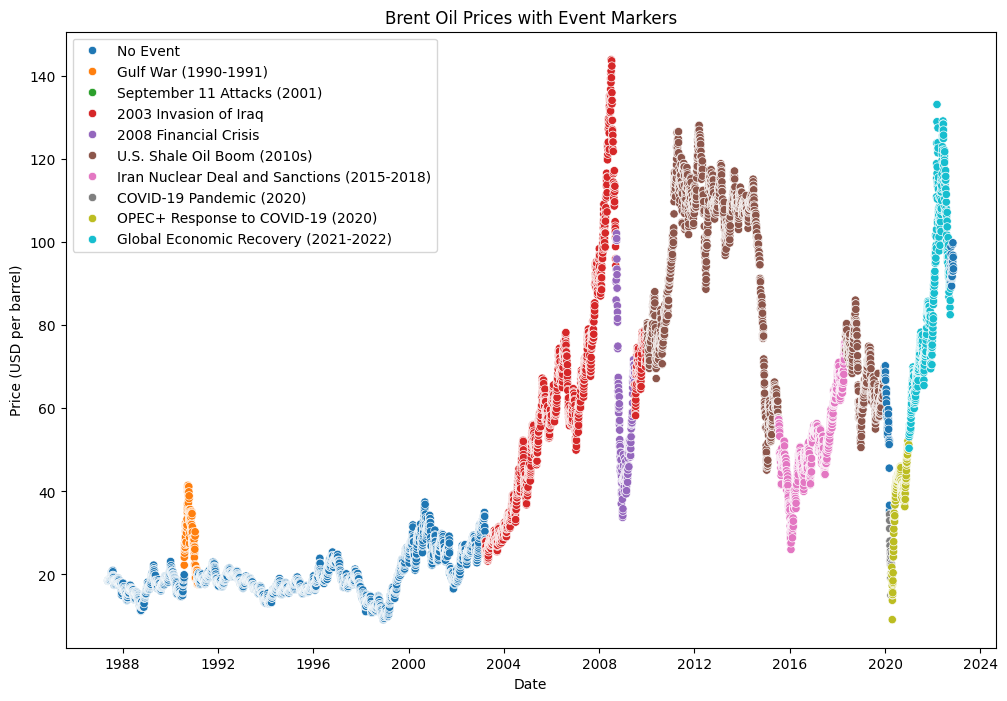

In [78]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Date', y='Price', hue='Event', data=price_data)
plt.title('Brent Oil Prices with Event Markers')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()